<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Artificial Bee Colony</div>

*Léa Berthomier*


Artificial Bee colony is a population based algorithm, like genetic algorithms, that can be used to optimize a function.

We'll try to use this method to find the minimum of a black box function f.

## Description of the algorithm

The algorithm is inspired by the functionning of a real bee colony, where worker bees explore their surrounding to find the best sources of food and then come back to the colony to tell the other bees where is the source.

The position of a food source will represent a solution or a variable, here a couple (x,y).

The quantity of nectar in food source represents the quality of the solution, its fitness, here it is f(x,y).

At the initialization of the algorithm, a "population" of food sources is randomly chosen and an employed bee is assigned to each food source. The employed bee goes to its food source and tries to find a better food source in the neighbourhood. If it finds a better one, it remembers its position.

Then, the employed bees all come back to the hive and show what they found to the onlooker bees. Each onlooker bee chooses a food source from the employed bees randomly (according to the quantity of nectar in the food source; the best have more chance to be chosen). Then, each onlooker bee will try to find a better food source in the neighbourhood of its previous food source.

Employed bees whose solutions cannot be improved by the onlooker bees through a predetermined number of trials become scouts and their solutions are abandoned. Then, the converted scouts start to search for new solutions, randomly.


<div class="alert alert-warning">
    <b>PSEUDO-CODE</b>
    
Initial food sources are produced for all employed bees

REPEAT

* Each employed bee goes to a food source in her memory and determines a closest source, then evaluates its nectar amount and comes back to the hive
* Each onlooker bee watches the dance of employed bees and chooses one of their sources depending on the quantity of food, and then goes to that source. After choosing again a new source in the neighbourhood, she evaluates its nectar amount. Food sources that counld not be improved are abandonned.
* Abandoned food sources are replaced with new food sources discovered by scouts.
* The best food source found so far is registered.

UNTIL (requirements are met)
</div>



## Exemple

We will try to use the ABC algorithm to find the minimum of the following black box function.

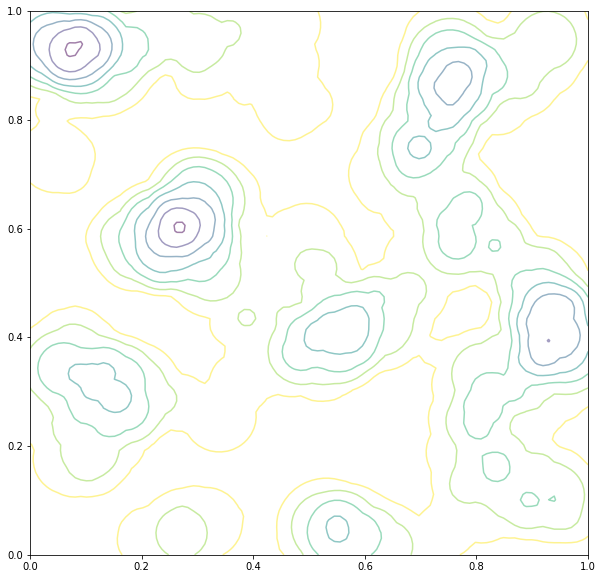

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

n_boulders = 150
boulders = np.random.uniform(0., 1., (n_boulders, 3))
boulders[:, 2] = 1/(3 ** np.random.choice(range(2, 4), (n_boulders)))

def eval_boulders(x, y, boulders = boulders):
    res = 0
    for i in range(boulders.shape[0]):
        eval_ = (x - boulders[i, 0]) ** 2 + (y - boulders[i, 1]) ** 2 - boulders[i, 2] ** 2
        if eval_ < 0:
            res += eval_
    return res


X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = np.zeros(X.shape)

for i in range(n_boulders):
    eval_ = (X - boulders[i, 0]) ** 2 + (Y - boulders[i, 1]) ** 2 - boulders[i, 2] ** 2
    Z[eval_ < 0] += eval_[eval_<0]

fig = plt.figure(figsize=(10, 10))
plt.contour(X, Y, Z, alpha=.5)

Below, we define some useful functions for the algorithm.

In [2]:
def get_new_food_source():
    '''Returns a food source :
       (x position, y position, quantity of nectar, nb of evaluations)'''
    x, y = random.random(), random.random()
    return [x, y, eval_nectar(x, y), 0]

def eval_nectar(x, y):
    return eval_boulders(x, y)

def get_neighbour(s, list_sources):
    s2 = random.choice(list_sources)
    r = random.uniform(-1,1)
    x = s[0] + r * abs(s2[0]-s[0])
    y = s[1] + r * abs(s2[1]-s[1])
    if x < -1 : x = -1
    if x > 1 : x = 1
    if y < -1 : y = -1
    if y > 1 : y = 1
    return [x,y, eval_nectar(x, y), 0]

Here is the main function of the algorithm :

In [3]:
nb_sources = 50
max_iter = 100
threshold_eval = 3

def ABC():
    
    # INIT : choose random food source and evaluate them
    food_sources = [get_new_food_source() for i in range(nb_sources)]
    best = [food_sources[0]]
    parcours = [[food_sources[0][0], food_sources[0][1], food_sources[0][1], food_sources[0][1]]]
    history = []
    
    for iteration in range(max_iter):
        
        history.append(food_sources)
        
        if iteration % 10 == 0 : print("Iteration : ", iteration)
        
        # Employed bees explore new food sources
        # If they find a better one, they remember it
        # Else we increment the counter of the source's nb of evaluations
        for i in range(nb_sources):
            s1 = food_sources[i]
            s2 = get_neighbour(s1, food_sources)
            if s2[2] < s1[2] : food_sources[i] = s2
            else : food_sources[i][-1] += 1
        
        # Onlooker bees choose a good source 
        choices = [i for i in range(nb_sources)]
        weights = [int(10000/(abs(s[2])+1)) for s in food_sources]
        onlooker_sources = random.choices(choices, weights, k=nb_sources)
        
        # Onlooker bees explore the neighbourhood of their source
        # The best source they find is stored
        # If they don't find a better source, we increment the counter again
        current_best = food_sources[onlooker_sources[0]]
        for i in onlooker_sources :
            s1 = food_sources[i]
            s2 = get_neighbour(s1, food_sources)
            if s2[2] < s1[2] :
                if s2[2] < current_best[2] : current_best = s2
                if s2[2] < best[-1][2] : best.append(s2)
            else : food_sources[i][-1] += 1
        parcours.append([current_best[0], current_best[1], best[-1][0], best[-1][1]])
        
                
        # The food sources that have been evaluated more times than the threshold are erased
        # and scout bees go find a new random source
        for i in range(nb_sources):
            if food_sources[i][-1] > threshold_eval :
                food_sources[i] = get_new_food_source()
    return best, parcours, history           

We now execute the algorithm. On the graph, each blue dot represents a solution (a food source) and its score. The red line represents the best score so far.

Iteration :  0
Iteration :  10
Iteration :  20
Iteration :  30
Iteration :  40
Iteration :  50
Iteration :  60
Iteration :  70
Iteration :  80
Iteration :  90
Best :  -0.05697585106598166


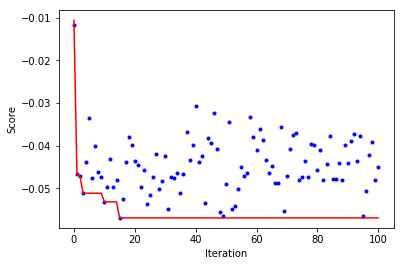

In [5]:
best, parcours, history = ABC()
X1 = [eval_nectar(x[0], x[1]) for x in parcours]
X2 = [eval_nectar(x[2], x[3]) for x in parcours]
print("Best : ", best[-1][2])
plt.plot(X1, 'b.')
plt.plot(X2, 'r-')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.show()

The following graph represents the evolution of the best solution found during the computation.

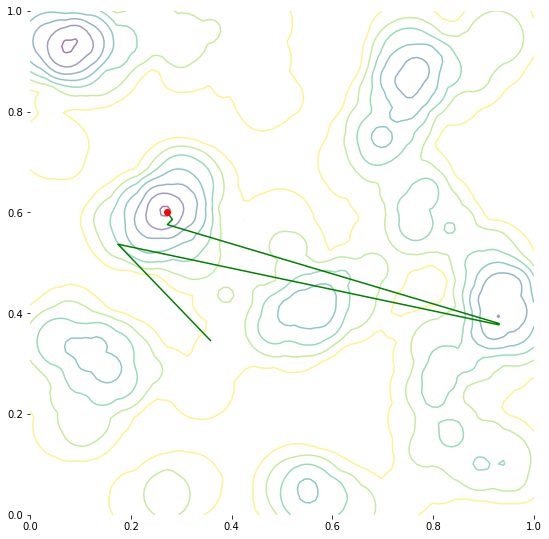

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax.contour(X, Y, Z, alpha=.5)
bx = [b[0] for b in best]
by = [b[1] for b in best]
plt.plot(bx, by, 'g-')
plt.plot(best[-1][0], best[-1][1], 'ro')